# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
Y_train = np.asarray(y_train).reshape(-1, 1)

In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn


X_r = np.asarray(X_train).reshape(-1, 1) #создаем двухмерный массив вида [[x_1]] 
X_ = []
    
for i in range(len(X_r)): # создаем цикл для того чтобы добавить x_0 == 1 и получить массив вида [[x_0, x_1]]
    f = np.insert(X_r[i], 0, 1)
    X_.append(f.tolist())

X_ = np.array(X_)

Находим $$X^TX$$



In [ ]:
X_T_X = (X_.T).dot(X_)
X_T_X

array([[ 50.        ,  -2.52525253],
       [ -2.52525253, 425.08417508]])

Находим $$(X^TX)^{-1}$$

In [ ]:
from numpy.linalg import inv

In [ ]:
X_T_X_inverted = inv(X_T_X)

X_T_X_inverted

array([[0.020006  , 0.00011885],
       [0.00011885, 0.00235318]])

Находим $$ w = (X^TX)^{-1}X^TY $$

In [ ]:
w = X_T_X_inverted.dot(X_.T).dot(Y_train)

print("b = %.5f, w_1 = %.5f" % (w[0][0],w[1][0]))

b = -7.33404, w_1 = 10.07654


In [ ]:
# реализация MSE и MAE
def mse(true, pred):    
    return np.mean((true - pred)**2)

def mae(true, pred):    
    return np.mean(np.abs(true - pred))

In [ ]:
Y_pred = [] 

for i in range(len(X_test)): # создаем цикл для того, чтобы узнать какие значение y получим после подбора весов
    Y_pred.append(w[1][0]*X_test[i][0] + w[0][0])

In [ ]:
##MSE и MAE бeз sklearn
print('MSE: ', mse(y_test, Y_pred))
print('MAE: ', mae(y_test, Y_pred))

MSE:  87.9842623547498
MAE:  7.413628524376049


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
##MSE и MAE с sklearn
print('MSE: ', mean_squared_error(y_test, Y_pred))
print('MAE: ', mean_absolute_error(y_test, Y_pred))

MSE:  87.9842623547498
MAE:  7.413628524376049


**Вывод: результаты сходятся**

###Реализация при помощи sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train) # обучение модели

w_ = model.coef_
b = model.intercept_

print("b = %.5f, w_1 = %.5f" % (b, w_[0]))



b = -9.10592, w_1 = 10.01784


In [ ]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_test_predicted))
print('MAE: ', mean_absolute_error(y_test, y_test_predicted))

MSE:  121.48933700127269
MAE:  8.839216777722141


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE
x_train_2 = data['x_train']
y_train_2 = data['y_train']


In [ ]:
X_r = np.asarray(data['x_train']).reshape(-1, 1) #создаем двухмерный массив вида [[x_1]] 
X_ = []
    
for i in range(len(X_r)): # создаем цикл для того чтобы добавить x_0 == 1 и получить массив вида [[x_0, x_1]]
    f = np.insert(X_r[i], 0, 1)
    X_.append(f.tolist())

X_ = np.array(X_)

In [ ]:
X_T_X = (X_.T).dot(X_)
X_T_X_inverted = inv(X_T_X)
w = X_T_X_inverted.dot(X_.T).dot(data['y_train'])

print("b = %.5f, w_1 = %.5f" % (w[0],w[1]))

b = 1.91864, w_1 = -0.30782


In [ ]:
y_train_predicted = []

for i in range(len(X_r)): # создаем цикл для того, чтобы узнать какие значение y получим после подбора весов
    y_train_predicted.append(w[1]*X_r[i][0] + w[0])

##MSE и MAE бeз sklearn
print('MSE: ', mse(data['y_train'], y_train_predicted))
print('MAE: ', mae(data['y_train'], y_train_predicted))

MSE:  0.26602820079745015
MAE:  0.4248919529947495


###Реализация при помощи sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(data['x_train'].reshape(-1, 1), data['y_train'].reshape(-1, 1)) # обучение модели

w_ = model.coef_
b = model.intercept_

In [ ]:
print("b = %.5f, w_1 = %.5f" % (b, w[1]))

b = 1.94300, w_1 = -0.30316


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

In [ ]:
### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

X_train=data["x_train"].reshape(250, 1)
y_train=data["y_train"]

In [ ]:
score = 100000

for i in range(1 , 15):

    linear_regression = LinearRegression()
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False) 
    X_polynomial = polynomial_features.fit_transform(X_train)
    linear_regression.fit(X_polynomial, y_train)
    y_predict=linear_regression.predict(X_polynomial)

    sc_d = mean_squared_error(y_train, y_predict)

    if score > sc_d:
      score = sc_d

print('BEST MSE:' + str(score))
print("BEST DEGREE: " + str(i))



BEST MSE:0.07144601503498435
BEST DEGREE: 14


In [ ]:
X_polynomial.shape

(250, 14)

Text(0.5, 1.0, 'Degree: 1')

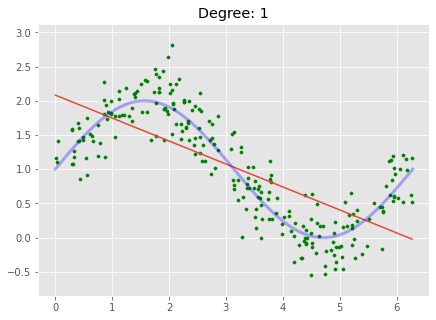

In [ ]:
linear_regression = LinearRegression()
polynomial_features = PolynomialFeatures(degree=1, include_bias=False) 
X_polynomial = polynomial_features.fit_transform(X_train)
linear_regression.fit(X_polynomial, y_train)
y_predict=linear_regression.predict(X_polynomial)

plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, s = 10, c = 'g')
plt.plot(X_train, y_predict)
margin = 0.3
plt.plot(data['support'], data['values'], alpha=0.3, label='True funcion', color='b',linewidth=3.0)
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.title("Degree: " + str(1))

Text(0.5, 1.0, 'Degree: 5')

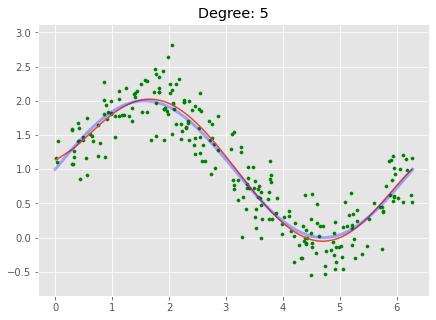

In [ ]:
linear_regression = LinearRegression()
polynomial_features = PolynomialFeatures(degree=5, include_bias=False) 
X_polynomial = polynomial_features.fit_transform(X_train)
linear_regression.fit(X_polynomial, y_train)
y_predict=linear_regression.predict(X_polynomial)

plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, s = 10, c = 'g')
plt.plot(X_train, y_predict)
margin = 0.3
plt.plot(data['support'], data['values'], alpha=0.3, label='True funcion', color='b',linewidth=3.0)
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.title("Degree: " + str(5))

Text(0.5, 1.0, 'Degree: 14')

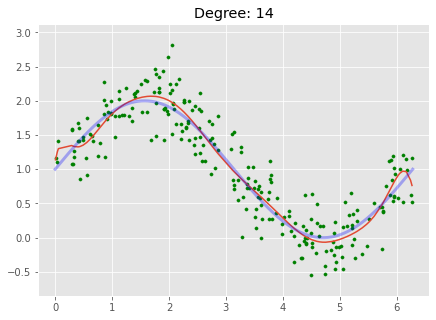

In [ ]:
linear_regression = LinearRegression()
polynomial_features = PolynomialFeatures(degree=14, include_bias=False) 
X_polynomial = polynomial_features.fit_transform(X_train)
linear_regression.fit(X_polynomial, y_train)
y_predict=linear_regression.predict(X_polynomial)


plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, s = 10, c = 'g')
plt.plot(X_train, y_predict)
margin = 0.3
plt.plot(data['support'], data['values'], alpha=0.3, label='True funcion', color='b',linewidth=3.0)
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.title("Degree: " + str(14))

**ВЫВОД:** по итогам цикла из 15 повторений, лучшим результатом была 14 степень полинома, но после того, как мы построили график, стало сразу понятно, что данная степень склонна **переобучаться**, поэтому исходя из графиков, **лучшей степенью будет 5**.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston
from sklearn.feature_selection import RFE 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
house_data = load_boston()
house_data 

## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

In [ ]:
df = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
df['target'] = house_data['target'].reshape(-1, 1)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X = df.drop("target", axis = 1)
Y = df['target']

In [ ]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=7) # используем RFE для того, чтобы выбрать признаки путем рекурсивного рассмотрения все меньших и меньших наборов признаков

X_new = rfe.fit_transform(X, Y)

pd.DataFrame(X_new)

,0,1,2,3,4,5,6
0,0.0,0.538,6.575,4.0900,1.0,15.3,4.98
1,0.0,0.469,6.421,4.9671,2.0,17.8,9.14
2,0.0,0.469,7.185,4.9671,2.0,17.8,4.03
3,0.0,0.458,6.998,6.0622,3.0,18.7,2.94
4,0.0,0.458,7.147,6.0622,3.0,18.7,5.33
...,...,...,...,...,...,...,...
501,0.0,0.573,6.593,2.4786,1.0,21.0,9.67
502,0.0,0.573,6.120,2.2875,1.0,21.0,9.08
503,0.0,0.573,6.976,2.1675,1.0,21.0,5.64
504,0.0,0.573,6.794,2.3889,1.0,21.0,6.48


**Обычный датасет:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

lr = LinearRegression().fit(X_train, y_train)

y_predict = lr.predict(X_test)

print("MAE: ", mean_absolute_error(y_test, y_predict)," MSE: ", mean_squared_error(y_test, y_predict))

MAE:  3.1605100535572768  MSE:  18.416122817730496


**Усеченный датасет:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3)

lr_2 = LinearRegression().fit(X_train, y_train)

y_predict_2 = lr_2.predict(X_test)

print("MAE: ", mean_absolute_error(y_test, y_predict_2)," MSE: ", mean_squared_error(y_test, y_predict_2))

MAE:  3.394473596816775  MSE:  19.50555217538403
